# Big Data in Finance Final Project

In [8]:
# Import Packages, Set-Up and Define Helper Functions

In [9]:
# Load necessary packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics

In [10]:
# Helper function to display the tree.
from IPython.display import Image 
import pydotplus

def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [12]:
# Adjust Jupyter Notebook display size
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [13]:
# Import data
train_data = pd.read_csv("Original_Data/train.csv")

# Data Inspection and Descriptives

### Description of Variables

- Id: A unique identifier associated with an application.
- Product_Info_1-7: A set of normalized variables relating to the product applied for
- Ins_Age: Normalized age of applicant
- Ht: Normalized height of applicant
- Wt: Normalized weight of applicant
- BMI: Normalized BMI of applicant
- Employment_Info_1-6: A set of normalized variables relating to the employment history of the applicant.
- InsuredInfo_1-7: A set of normalized variables providing information about the applicant.
- Insurance_History_1-9: A set of normalized variables relating to the insurance history of the applicant.
- Family_Hist_1-5: A set of normalized variables relating to the family history of the applicant.
- Medical_History_1-41: A set of normalized variables relating to the medical history of the applicant.
- Medical_Keyword_1-48: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
- Response: This is the target variable, an ordinal variable relating to the final decision associated with an application

In [14]:
# Drop Id column (we don't want it as feature for the model)
train_data = train_data.iloc[:,1:]

In [15]:
# Display feature columns
train_data.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48', 'Response'], dtype='object', length=127)

In [16]:
# Check summary stats
train_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2

### In-depth data inspection

In [17]:
# Display unique value count for each column and type of each column
for column in train_data.columns:
    print("Type of column " + str(column) + " is: " + str(type(train_data[column][1])))
    print("Unique value count for column " + str(column) + " is: " 
          + str(train_data[column].nunique()))
    print("Unique values of column " + str(column) + " are: " 
          + str(train_data[column].unique()) + "\n")

Type of column Product_Info_1 is: <class 'numpy.int64'>
Unique value count for column Product_Info_1 is: 2
Unique values of column Product_Info_1 are: [1 2]

Type of column Product_Info_2 is: <class 'str'>
Unique value count for column Product_Info_2 is: 19
Unique values of column Product_Info_2 are: ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1' 'B2'
 'C3' 'C2' 'A4' 'B1']

Type of column Product_Info_3 is: <class 'numpy.int64'>
Unique value count for column Product_Info_3 is: 34
Unique values of column Product_Info_3 are: [10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3 18  2 22 17 38
 19 34 12 24 20  1 16  5 27]

Type of column Product_Info_4 is: <class 'numpy.float64'>
Unique value count for column Product_Info_4 is: 1491
Unique values of column Product_Info_4 are: [ 0.07692308  0.48717949  0.23076923 ...,  0.10993846  0.75393128
  0.10024923]

Type of column Product_Info_5 is: <class 'numpy.int64'>
Unique value count for column Product_Info_5 is:

Unique values of column Medical_Keyword_18 are: [0 1]

Type of column Medical_Keyword_19 is: <class 'numpy.int64'>
Unique value count for column Medical_Keyword_19 is: 2
Unique values of column Medical_Keyword_19 are: [0 1]

Type of column Medical_Keyword_20 is: <class 'numpy.int64'>
Unique value count for column Medical_Keyword_20 is: 2
Unique values of column Medical_Keyword_20 are: [0 1]

Type of column Medical_Keyword_21 is: <class 'numpy.int64'>
Unique value count for column Medical_Keyword_21 is: 2
Unique values of column Medical_Keyword_21 are: [0 1]

Type of column Medical_Keyword_22 is: <class 'numpy.int64'>
Unique value count for column Medical_Keyword_22 is: 2
Unique values of column Medical_Keyword_22 are: [0 1]

Type of column Medical_Keyword_23 is: <class 'numpy.int64'>
Unique value count for column Medical_Keyword_23 is: 2
Unique values of column Medical_Keyword_23 are: [0 1]

Type of column Medical_Keyword_24 is: <class 'numpy.int64'>
Unique value count for column Medic

In [18]:
# Product_Info_1, Product_Info_5, Product_Info6, Employment_Info_3, Employment_Info_5, InsuredInfo_2
# InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Medical_History4
# Medical_History_22, Medical_History_33, Medical_History_38, Medical_Keyword_1-48
# are numeric categorical variables with 2 categories

# Product_Info_3, Product_Info_7, Employment_Info_2, InsuredInfo_1, InsuredInfo3, InsuranceHistory_2
# Insurance_History3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9
# Family_Hist_1, Medical_History_3, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8
# Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14
# Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20
# Medical_History_21, Medical_History_23, Medical_History_25-31, Medical_History_34-37, Medical_History_39-41
# are numeric categorical variables with more than 2 categories

# Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6
# Insurance_History5, Family_Hist_2, Family_Hist_3, Familiy_Hist_4, Family_Hist_5, Medical_History_1
# Medical_History2, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32
# are numeric continuous variables

# Response
# is the target variable with 8 numeric categories.

### Correlations

In [19]:
# Correlations
corr_matrix = train_data.corr()
corr_response = corr_matrix['Response']

#Show strongest negative correlations
corr_response.sort_values()[0:10]

BMI                   -0.381601
Wt                    -0.351395
Medical_Keyword_15    -0.259169
Medical_Keyword_3     -0.257706
Ins_Age               -0.209610
Medical_Keyword_48    -0.159557
Medical_History_16    -0.137542
Insurance_History_2   -0.122196
Employment_Info_3     -0.116408
Medical_History_30    -0.114870
Name: Response, dtype: float64

In [20]:
#Show strongest positive correlations
corr_response.sort_values(ascending=False)[1:11]

Medical_History_23    0.286584
Medical_History_15    0.277311
Medical_History_4     0.239896
Medical_History_39    0.220176
Product_Info_4        0.202434
Medical_History_6     0.159230
Medical_History_32    0.144536
Medical_History_13    0.134863
Medical_History_40    0.131519
InsuredInfo_6         0.130476
Name: Response, dtype: float64

### Scatterplots and Histograms for most-correlated Variables

In [21]:
#Visualize relationships
import matplotlib.pyplot as plt

#### BMI (Body Mass Index)

In [22]:
#BMI vs. response
plt.scatter(train_data['BMI'][:10000],train_data['Response'][:10000])
plt.xlabel("BMI")
plt.ylabel("Response")
plt.title("BMI vs. Response")
plt.show

<function matplotlib.pyplot.show>

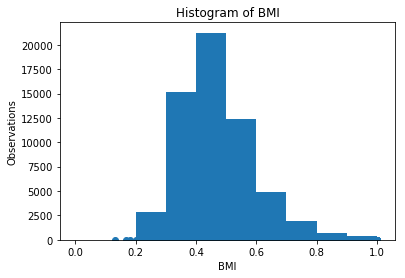

In [23]:
plt.hist(train_data['BMI'])
plt.xlabel("BMI")
plt.ylabel("Observations")
plt.title("Histogram of BMI")
plt.show()

#### Weight

In [24]:
#Wt vs. response
plt.scatter(train_data['Wt'][:10000],train_data['Response'][:10000])
plt.xlabel("Wt")
plt.ylabel("Response")
plt.title("Wt vs. Response")
plt.show

<function matplotlib.pyplot.show>

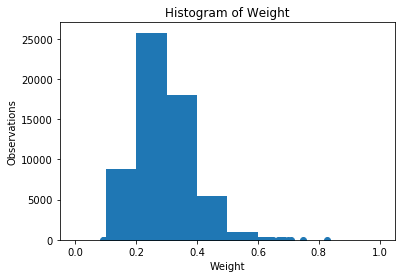

In [25]:
plt.hist(train_data['Wt'])
plt.xlabel("Weight")
plt.ylabel("Observations")
plt.title("Histogram of Weight")
plt.show()

#### Ins_Age

In [26]:
#Ins_Age vs. response
plt.scatter(train_data['Ins_Age'][:10000],train_data['Response'][:10000])
plt.xlabel("Ins_Age")
plt.ylabel("Response")
plt.title("Ins_Age vs. Response")
plt.show

<function matplotlib.pyplot.show>

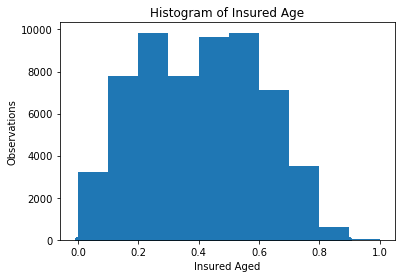

In [27]:
plt.hist(train_data['Ins_Age'])
plt.xlabel("Insured Aged")
plt.ylabel("Observations")
plt.title("Histogram of Insured Age")
plt.show()

## Data Cleaning & Feature Engineering

In [28]:
# Isolate target variable
train_data_target = train_data["Response"]
train_data = train_data.iloc[:,:-1]

### Transformation of Categorical Variables

In [29]:
# We observe that Product_Info_2 is a categorical variable with 19 non-numeric categories
# Transform Product_Info_2 to dummy variable
train_data = pd.get_dummies(train_data, columns=['Product_Info_2'])

In [30]:
train_data.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

### Treat Missing Values

#### Step 1: Inspect Number of Missing Values

In [31]:
# Show columns with missing data (test set)
train_data.isnull().sum().nlargest(10)

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
dtype: int64

In [32]:
# Show percentage of missing data (train set)
missing = train_data.isnull().sum()/len(train_data)
missing = pd.DataFrame(missing[missing>0], columns=["% of Missing Values"])
missing.sort_values(["% of Missing Values"],ascending=0)

,% of Missing Values
Medical_History_10,0.990620
Medical_History_32,0.981358
Medical_History_24,0.935990
Medical_History_15,0.751015
Family_Hist_5,0.704114
Family_Hist_3,0.576632
Family_Hist_2,0.482579
Insurance_History_5,0.427679
Family_Hist_4,0.323066
Employment_Info_6,0.182786


In [33]:
# Columns with missing values:
# Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist3
# Family_Hist_4, Family_Hist_5, Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24
# Medical_History_32
# We will treat them now

In [34]:
# Inspect data with missing values
train_data[missing.index][10:20]

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
10,0.0500,NaN,0.150,0.000587,NaN,0.470588,0.647887,NaN,1.0,NaN,NaN,NaN,NaN
11,0.0900,NaN,1.000,NaN,0.405797,NaN,0.352113,NaN,4.0,NaN,8.0,NaN,NaN
12,0.0750,0.0,NaN,0.000667,NaN,0.549020,NaN,0.482143,5.0,NaN,NaN,NaN,NaN
13,0.1000,NaN,0.075,NaN,0.420290,NaN,0.338028,NaN,NaN,NaN,1.0,NaN,NaN
14,0.1600,0.0,0.600,0.004000,NaN,0.578431,0.535211,NaN,1.0,NaN,NaN,NaN,NaN
15,0.0750,0.0,NaN,0.000480,NaN,0.549020,NaN,0.535714,1.0,NaN,240.0,NaN,NaN
16,0.1000,0.0,0.250,NaN,0.275362,NaN,0.253521,NaN,1.0,NaN,NaN,NaN,NaN
17,0.0378,0.0,0.036,NaN,NaN,0.343137,0.436620,NaN,39.0,NaN,NaN,NaN,NaN
18,0.0800,0.0,NaN,0.000400,NaN,0.509804,0.507042,NaN,61.0,NaN,0.0,NaN,NaN
19,0.0550,0.0,0.000,NaN,0.289855,NaN,0.281690,NaN,0.0,NaN,NaN,NaN,NaN


#### Step 2: Treat the Columns with Missing Data

##### 2.1) Combination of Family History Columns

We decided to neglect this transformation in the end as it seemed to reduce the performance of our models.

In [35]:
# It seems as if the NaN values for Family_Hist_2 and Family_Hist_3 
# as well as Family_Hist_4 and Family_Hist_5 alternate

# Let's check whether there are any rows where both of them have a value
# print(len(train_data[np.invert(train_data["Family_Hist_2"].isnull()) 
#                 & np.invert(train_data["Family_Hist_3"].isnull())]))
# print(len(train_data[np.invert(train_data["Family_Hist_4"].isnull()) 
#                 & np.invert(train_data["Family_Hist_5"].isnull())]))
# There are no rows where this is the case

In [36]:
# Are there any rows where both are NaN?
# print(len(train_data[train_data["Family_Hist_2"].isnull() 
#                 & train_data["Family_Hist_3"].isnull()])/len(train_data))
# print(len(train_data[train_data["Family_Hist_4"].isnull() 
#                 & train_data["Family_Hist_5"].isnull()])/len(train_data))
# It is the case in ~6% or ~3% of the cases for both the test and train dataset

In [37]:
# Firstly we decided to create new columns that combine the values of both variables
# train_data["Family_Hist_2_3"] = np.nan_to_num(train_data["Family_Hist_2"]) 
#                 + np.nan_to_num(train_data["Family_Hist_3"])
# train_data["Family_Hist_4_5"] = np.nan_to_num(train_data["Family_Hist_4"]) 
#                 + np.nan_to_num(train_data["Family_Hist_5"])

In [38]:
# As np.nan_to_num transforms nan to 0, 
# we need to set all rows where both family history values where nan back to nan
# train_data["Family_Hist_2_3"].iloc[train_data[train_data["Family_Hist_2"].isnull() 
#                 & train_data["Family_Hist_3"].isnull()].index] = np.nan
# train_data["Family_Hist_4_5"].iloc[train_data[train_data["Family_Hist_4"].isnull() 
#                 & train_data["Family_Hist_5"].isnull()].index] = np.nan

In [39]:
# In a next step, to keep the original information of the values being split up,
# we introduce a dummy variable that takes the following values:
# In the case of Family_Hist_2_3....
# 0 if Family Hist 2 had a value
# 1 if Family Hist 3 had a value
# NaN if both had a NaN
# In the case of Family_Hist_4_5....
# 0 if Family Hist 4 had a value
# 1 if Family Hist 5 had a value
# NaN if both had a NaN
# train_data["Dummy_Family_Hist_2_3"] = 0
# train_data["Dummy_Family_Hist_2_3"]
#                  .iloc[train_data[train_data["Family_Hist_2"].isnull()].index] = 1
# train_data["Dummy_Family_Hist_2_3"]
#                  .iloc[train_data[train_data["Family_Hist_2_3"].isnull() ].index] = np.nan
# train_data["Dummy_Family_Hist_4_5"] = 0
# train_data["Dummy_Family_Hist_4_5"]
#                  .iloc[train_data[train_data["Family_Hist_4"].isnull()].index] = 1
# train_data["Dummy_Family_Hist_4_5"]
#                  .iloc[train_data[train_data["Family_Hist_4_5"].isnull() ].index] = np.nan

##### 2.2) Dropping Some columns due to high number of NAs

In [40]:
# Drop columns with >50% missing values now, as well as redundant Family_Hist culumns
# train_data = train_data.drop(['Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32'], axis=1)
train_data = train_data.drop(['Medical_History_10','Medical_History_15',
                              'Medical_History_24','Medical_History_32'], axis=1)

##### 2.3) Imputation of missing values

In [41]:
# In order to deal with missing values we will use KNN imputation
# This usually performs better than simple imputation with statistical summary statistics such as the
# mean or median

# KNN is an algorithm that is useful for matching a point with its closest k neighbors
# in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal 
# and categorical which makes it particularly useful for dealing with all kind of missing data.
# The assumption behind using KNN for missing values is that a point value can be approximated by 
# the values of the points that are closest to it, based on other variables.

# Save column names
column_names = np.asarray(train_data.columns)

from fancyimpute import KNN,SimpleFill

# As the imputation takes a lot of time, we import the imputed dataset here instead
# of going through the calculation each time
train_data_imputed = pd.read_csv("train_data_imputed.csv", index_col=0)
# train_data_imputed = KNN(k=5).complete(train_data)
#train_data_imputed = SimpleFill(fill_method='mean').complete(train_data)

Using TensorFlow backend.
/Users/robertquick/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [42]:
#Convert back to dataframe
train_data_complete = pd.DataFrame(train_data_imputed, columns = column_names)
train_data_complete.to_csv("train_data_imputed.csv")
train_data_complete.head()

### do we need to convert back to correct type of column (integer etc.)?

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1.0,10.0,0.076923,2.0,1.0,1.0,0.641791,0.581818,0.148536,0.323008,0.028,12.0,1.0,0.0,3.0,0.40461,1.0,2.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,0.000667,1.0,1.0,2.0,2.0,0.635295,0.598039,0.556675,0.526786,4.000000,112.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,26.0,0.076923,2.0,3.0,1.0,0.059701,0.600000,0.131799,0.272288,0.000,1.0,3.0,0.0,2.0,0.00180,1.0,2.0,6.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.000133,1.0,3.0,2.0,2.0,0.188406,0.436899,0.084507,0.561311,5.000000,412.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.076923,2.0,3.0,1.0,0.029851,0.745455,0.288703,0.428780,0.030,9.0,1.0,0.0,2.0,0.03000,1.0,2.0,8.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.000782,3.0,2.0,3.0,3.0,0.304348,0.389283,0.225352,0.516054,10.000000,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,1.

### Split in Train test data

As some of the feature Engineering uses the response variable, we already split into train and test datasets here so that we don't take any target variables of the test set into account.

In [43]:
# Complete dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_complete, 
                                train_data_target, test_size=0.33, random_state=42)

### Feature Engineering

#### Create dataset without Feature Engineering for later comparison

In [44]:
X_train_no_fe, X_test_no_fe = X_train, X_test

In [45]:
#Export cleaned data
X_train_no_fe.to_csv('X_train_no_fe.csv')
X_test_no_fe.to_csv('X_test_no_fe.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

#### 3-step Feauture Engineering

#### Step 1: Build sum of Medical_Keyword dummies

In [46]:
# FEATURE ENGINEERING 1: Build sum of Medical_Keyword dummies
key = list(map(str, list(range(1,49))))
mystring = "Medical_Keyword_"
med_keyword = [mystring + s for s in key]

X_train["Medical_Keyword_Sum"] = X_train[med_keyword].sum(axis=1)
X_test["Medical_Keyword_Sum"] = X_test[med_keyword].sum(axis=1)

/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Step 2: Compute Medical Keyword Scores

In [47]:
# FEATURE ENGINEERING 2
train_data_complete["Response"] = train_data_target
# STEP 2.1: Replace dummy variables for medical keywords with their target mean

In [48]:
# Calculate mean responses for each medical keyword
med_keyword_mean_responses = []

In [49]:
for keyword in med_keyword:
    temp = X_train[X_train[keyword] == 1]
    med_keyword_mean_responses.append(np.mean(y_train[X_train[keyword] == 1]))

In [50]:
temp_1 = X_train
temp_2 = X_test

In [51]:
for i, keyword in enumerate(med_keyword):
    temp_1[keyword] = temp_1[keyword].replace(1,med_keyword_mean_responses[i])
    temp_2[keyword] = temp_2[keyword].replace(1,med_keyword_mean_responses[i])

/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
X_train["Medical_Keyword_Mean"] = temp_1[med_keyword].mean(axis=1)
X_train["Medical_Keyword_Max"] = temp_1[med_keyword].max(axis=1)
X_test["Medical_Keyword_Mean"] = temp_2[med_keyword].mean(axis=1)
X_test["Medical_Keyword_Max"] = temp_2[med_keyword].max(axis=1)

/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/robertquick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [53]:
# Drop medical keyword columns
train_data_complete = train_data_complete.drop(med_keyword, axis=1)

In [54]:
#Export cleaned data
X_train.to_csv('X_train.csv')
X_test.to_csv("X_test.csv")

In [55]:
#train_data_complete = pd.read_csv('cleaned_train_data.csv', index_col=0)
#train_data_complete = train_data_complete.drop(["Response"],axis=1)

## Options (For Performance Comparison)

### Option 1: Without Feature Engineering?

In [56]:
Without_FE = False
if Without_FE:
    X_train = pd.read_csv("X_train_no_fe.csv", index_col= 0)
    X_test =  pd.read_csv("X_test_no_fe.csv", index_col= 0)
    print("You have chosen NOT to use Feature Engineering")
else:
    X_train = pd.read_csv("X_train.csv", index_col= 0)
    X_test =  pd.read_csv("X_test.csv", index_col= 0)
    print("You have chosen to use Feature Engineering")

You have chosen to use Feature Engineering


### Option 2: Reduction into 3 risk levels

In [57]:
Three_Risk_Levels = False
if Three_Risk_Levels:
    y_test = y_test.replace([1,2,3],1)
    y_test = y_test.replace([4,5,6],2)
    y_test = y_test.replace([7,8],3)
    
    y_train = y_train.replace([1,2,3],1)
    y_train = y_train.replace([4,5,6],2)
    y_train = y_train.replace([7,8],3)
    target_names = [1,2,3]
    print("You have chosen to reduce the amount of risk levels")
else:
    y_train = pd.read_csv("y_train.csv", index_col= 0,header=None)
    y_test = pd.read_csv("y_test.csv", index_col= 0,header=None)
    target_names = [1,2,3,4,5,6,7,8]
    print("You have chosen NOT to reduce the amount of risk levels")

You have chosen NOT to reduce the amount of risk levels


# PCA

In [58]:
# First, we standardized and normalized the data further
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)

from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train_standard = norm.fit_transform(X_train_standard)

In [59]:
# Then, PCA was conducted
num_obs= 1000
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fitted = pca.fit_transform(X_train_standard[0:num_obs])

In [60]:
# Data was transformed into a DataFrame for visualization
pca_pd = pd.DataFrame(pca_fitted, columns=["x","y"])
pca_pd["label"] = y_train[0:num_obs].values

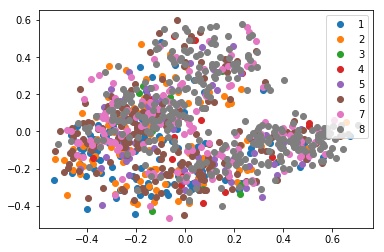

In [63]:
groups = pca_pd.groupby('label')
from itertools import cycle
markers = ['.', '.', '.','.', '.', '.','.','.']
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), marker in zip(groups, cycle(markers)):
    ax.plot(group.x, group.y, marker=marker, linestyle='', ms=12, label=name)
ax.legend()

plt.show()

# Modelling

## Multiclass Ordinal Logistic Regression

Accuracy Training         : 0.214075656655
Accuracy Testing         : 0.210400081649
Quadratic Kappa Score:  0.509648159481


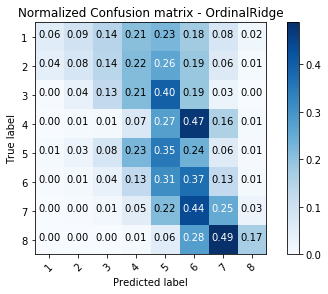

In [319]:
from sklearn import metrics
import mord
import pprint
pp = pprint.PrettyPrinter(indent=4)
OLR_train_target = np.array(y_train[1])-1
OLR_test_target = np.array(y_test[1])-1
# Construct the ordinal logistic regression model
mord_model = mord.OrdinalRidge(alpha=1)

# Train it on our training data
mord_model.fit(X_train, OLR_train_target)

# Predict the values of the target variable
mord_pred = mord_model.predict(X_test)
mord_pred_train = mord_model.predict(X_train)

# Score at training
print("Accuracy Training         :", sum(mord_pred_train==OLR_train_target)/len(OLR_train_target))

# Score at testing
print("Accuracy Testing         :", sum(mord_pred==OLR_test_target)/len(OLR_test_target))

# Print quadratic kappa score
print("Quadratic Kappa Score: ", metrics.cohen_kappa_score(np.array(OLR_test_target)
                                                           ,mord_pred, weights="quadratic"))

# Print confusion matrix
mord_cnf_matrix = metrics.confusion_matrix(OLR_test_target,mord_pred)
plot_confusion_matrix(mord_cnf_matrix, classes=target_names, normalize = True,
                      title='Normalized Confusion matrix - OrdinalRidge')

## Support Vector Machine

Accuracy Training         : 0.529496041222
Accuracy Testing         : 0.407532149418
Quadratic Kappa Score:  0.297944878597


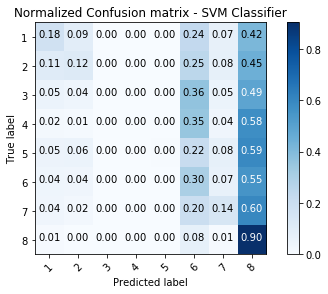

In [94]:
from sklearn import svm
# Construct the support vector machine model
clf_2 = svm.SVC()

# Train it on our training data
clf_2.fit(X_train, y_train)

# Predict the values of the target variable
clf_2_pred = clf_2.predict(X_test)

# Score at training
print("Accuracy Training         :", clf_2.score(X_train,y_train))

# Score at testing
print("Accuracy Testing         :", clf_2.score(X_test,y_test))

# Print quadratic kappa score
print("Quadratic Kappa Score: ", metrics.cohen_kappa_score(np.array(y_test),
                                                           clf_2_pred, weights="quadratic"))

# Print confusion matrix
svm_cnf_matrix = metrics.confusion_matrix(y_test,clf_2_pred)
plot_confusion_matrix(svm_cnf_matrix, classes=target_names, normalize = True,
                      title='Normalized Confusion matrix - SVM Classifier')

## Simple Regression Tree

In [58]:
# Regression tree
#Import packages
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
tree = DecisionTreeRegressor(max_leaf_nodes=50)
tree.fit(X_train, y_train)

# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training         :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

### Regression tree is not suitable in this case

Accuracy Training         : 0.333861558456
Accuracy Testing         : 0.316742434054


## Classification Tree

### Full Dataset

Accuracy Training        : 0.432298605002
Accuracy Testing         : 0.423300673607
Kappa score              : 0.417147819941


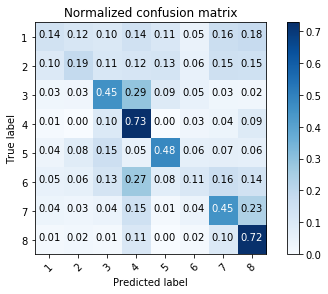

In [59]:
### Grid search: Find best parameters for classification tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define Classification Tree
tree = DecisionTreeClassifier(max_leaf_nodes=97, min_samples_leaf = 100,max_depth=7,
                                random_state=0, class_weight="balanced")

tree.fit(X_train,y_train)


# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

# Kappa score
tree_pred = tree.predict(X_test)
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

# Plot the tree
# Image(plot_tree(tree, column_names, target_names))

#Confusion matrix for classifcation decision tree

# Compute confusion matrix
tree_cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(tree_cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

### Only 8 most important features

In [321]:
#Feature importance based on grid search
column_names = X_test.columns
important_features = pd.DataFrame(data=tree.feature_importances_ , 
                                  index=column_names, columns=["Feature_Importance"])
important_features = important_features.sort_values(["Feature_Importance"],
                                                    ascending=False)[0:10]
important_features

,Feature_Importance
BMI,0.111822
Product_Info_4,0.058820
Ins_Age,0.055605
Medical_History_4,0.045052
Wt,0.042324
Family_Hist_3,0.039964
Family_Hist_5,0.033975
Family_Hist_4,0.032957
Medical_History_1,0.028624
Medical_Keyword_Mean,0.027882


In [61]:
# Include only 8 most important variables (according to feature importance)
X_red = X_train[list(important_features[0:8].index)]
X_test_red = X_test[list(important_features[0:8].index)]

Accuracy Training        : 0.42345104939
Accuracy Testing         : 0.423351704429
Kappa score              : 0.430314193199


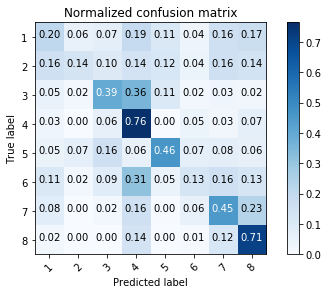

In [62]:
###Classification tree with 8 most important features only
# Import libraries
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Set up initial tree
tree = DecisionTreeClassifier(max_leaf_nodes = 50, min_samples_leaf = 100, 
                              random_state=0, class_weight="balanced")
tree.fit(X_red,y_train)

# Score at training
score_train = tree.score(X_red, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test_red, y_test)
print("Accuracy Testing         :", score_test)

# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree.predict(X_test_red), 
                                  weights="quadratic")
print("Kappa score              :", kappa)

# Plot the tree
#Image(plot_tree(tree, list(important_features[0:8].index), target_names))

#Confusion matrix for classifcation decision tree

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree.predict(X_test_red))

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

### Reducing number of features to 8 slightly improves performance

## Random Forrest

### Full Dataset

Accuracy Training        : 0.481487997989
Accuracy Testing         : 0.47601551337
Kappa score              : 0.35777854128


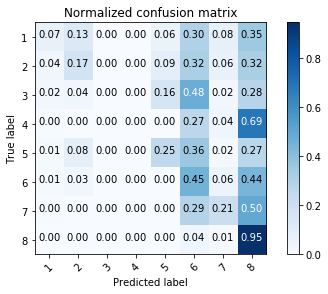

In [73]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier

#Set up tree
tree = RandomForestClassifier(n_estimators = 2000, max_leaf_nodes=50, min_samples_leaf = 100)
tree.fit(X_train, y_train)

# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = tree.predict(X_test)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

#Confusion matrix for classifcation decision tree

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

### Only 8 most important features

Accuracy Training        : 0.511222822672
Accuracy Testing         : 0.513421106348
Kappa score              : 0.385581730343


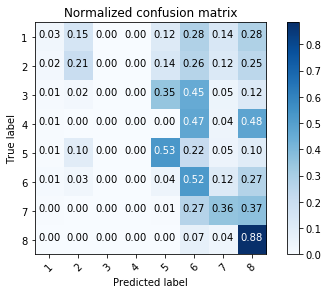

In [74]:
#Random forest with 8 most important features

#Import libraries
from sklearn.ensemble import RandomForestClassifier

#Set up tree
tree = RandomForestClassifier(n_estimators = 2000, max_leaf_nodes=50, min_samples_leaf = 100)
tree.fit(X_red,y_train)
# Score at training
score_train = tree.score(X_red, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test_red, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = tree.predict(X_test_red)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

#Confusion matrix for classifcation decision tree

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

## Gradient Boosting

### Full Dataset

/Users/robertquick/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Training        : 0.596254869926
Accuracy Testing         : 0.546335986936
Kappa score              : 0.511731240148


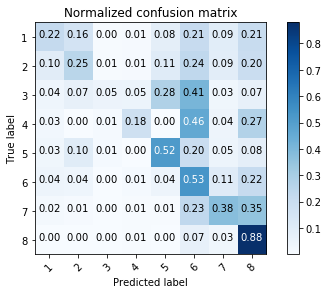

In [320]:
#Import library
from sklearn.ensemble import GradientBoostingClassifier

#params = { 
#           'learning_rate'  :  [0.11],
#            'n_estimators': [150],
#            'max_depth' : [5]
#         }

tree = GradientBoostingClassifier(max_leaf_nodes = 100)

#cv = ShuffleSplit(n_splits=10, random_state=0)
# grid = GridSearchCV(estimator=tree, param_grid=params )
# grid.fit(X_train, y_train)

# tree = grid.best_estimator_
tree.fit(X_train,y_train)

# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = tree.predict(X_test)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, 
                      normalize=True, title='Normalized confusion matrix')

In [66]:
#Feature importance based on grid search
column_names = X_test.columns
important_features = pd.DataFrame(data=tree.feature_importances_ , 
                                  index=column_names, columns=["Feature_Importance"])
important_features = important_features.sort_values(["Feature_Importance"],
                                                    ascending=False)[0:10]
important_features

,Feature_Importance
BMI,0.111678
Product_Info_4,0.058531
Ins_Age,0.055373
Medical_History_4,0.044865
Wt,0.042331
Family_Hist_3,0.039853
Family_Hist_5,0.034642
Family_Hist_4,0.032798
Medical_History_1,0.028351
Family_Hist_2,0.028261


### AdaBoost

#### Full Dataset

Accuracy Training        : 0.527233882116
Accuracy Testing         : 0.528832414779
Kappa score              : 0.41322760998


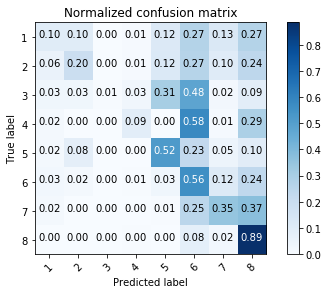

In [67]:
#Import library
from sklearn.ensemble import AdaBoostClassifier

#See up tree
tree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=100, 
                                                                min_samples_leaf = 50,
                        random_state=0), n_estimators = 5, learning_rate=0.01)

# tree = grid.best_estimator_
tree.fit(X_train,y_train)

# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = tree.predict(X_test)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

#### Only 8 most important features

Accuracy Training        : 0.502651753173
Accuracy Testing         : 0.507960808328
Kappa score              : 0.382106875748


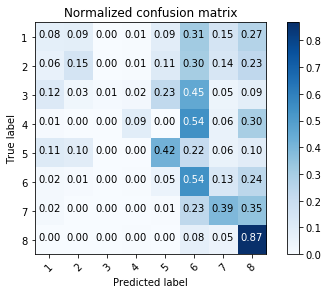

In [68]:
#Adaboost with 8 most important features only
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier

tree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=50, 
                          min_samples_leaf = 50, random_state=0),
                          n_estimators = 50, learning_rate=0.01)

tree.fit(X_red, y_train)
# Score at training
score_train = tree.score(X_red, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test_red, y_test)
print("Accuracy Testing         :", score_test)

# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree.predict(X_test_red), 
                                  weights="quadratic")
print("Kappa score              :", kappa)

#Confusion matrix for classifcation decision tree

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree.predict(X_test_red))

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

### AdaBoost GridSearch

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.0min finished


Accuracy Training        : 0.491768254367
Accuracy Testing         : 0.5
Kappa score              : 0.464365063003


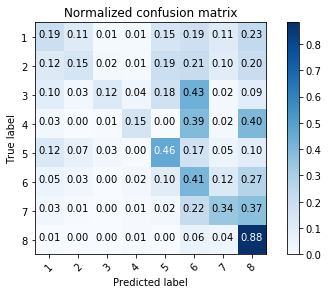

In [95]:
#AdaBoost with 8 most important features only

params = { 
           'n_estimators'  :  range(50,100,25),
       'learning_rate'  : [0.5,0.7,0.9,1.1,1.3,1.5]
        }

tree = AdaBoostClassifier(random_state=0)

#cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, param_grid=params, verbose = 1 )
grid.fit(X_train, y_train)

tree = grid.best_estimator_
tree.fit(X_train,y_train)

# Score at training
score_train = tree.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = tree.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = tree.predict(X_test)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')

### XGBoost

In [ ]:
# define parameters with gridsearch
# Define parameters

params = { 
            'max_depth' : range(3,10),
            'min_child_weight' : range(1,6)
         }

model = XGBClassifier(max_depth = 6, gamma = 0, subsample=0.8, 
                      colsample_bytree=0.8, learning_rate = 0.05)

#cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=params )
grid.fit(X_train, y_train)

# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Accuracy Training        : 0.611738092246
Accuracy Testing         : 0.550826699326
Kappa score              : 0.490949158917


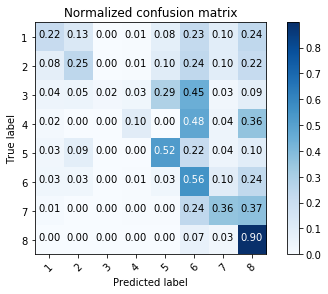

In [98]:
from xgboost import XGBClassifier

# Set up tree
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)
model.fit(X_train, y_train)

# Score at training
score_train = model.score(X_train, y_train)
print("Accuracy Training        :", score_train)

# Score at testing
score_test = model.score(X_test, y_test)
print("Accuracy Testing         :", score_test)

tree_pred = model.predict(X_test)
# Kappa score
kappa = metrics.cohen_kappa_score(np.array(y_test),tree_pred, weights="quadratic")
print("Kappa score              :", kappa)

#Confusion matrix for XGboost

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')